In [21]:
# Imports 
import os
import sys
from io import StringIO
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [27]:
# Load nasa stca standard trajectory
traj_nasa_std = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')

# Initialize pyna
py = pyna()

# Set config
py.case_name = 'stca'
py.atmosphere_type = 'stratified'
py.thrust_lapse = True
py.save_results = False
py.pkrot = True
py.k_rot = 1.27
py.max_iter = 50
py.TS_to = 0.88
py.TS_vnrs = 0.88
py.TS_cb = 0.61
py.z_cb = traj_nasa_std['Z [m]'][np.where(traj_nasa_std['TS [-]'] < 0.65)[0][0]]
py.z_max = traj_nasa_std['Z [m]'].values[-1]
py.v_max = traj_nasa_std['V [m/s]'].values[-1]
py.tolerance = 1e-5

In [ ]:
# Compute trajectory
py.compute_trajectory(trajectory_mode='flyover')

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/utils/options_dictionary.py:332: OMDeprecationWarning:'gradient method' is not a valid python name and will become an invalid option name in a future release. You can prevent this warning (and future exceptions) by declaring this option using a valid python name.


--- Linkage Report [phases] ---
    --- groundroll - rotation ---
        time               [final] ==  time           [initial]
        states:x           [final] ==  states:x       [initial]
        states:v           [final] ==  states:v       [initial]
        parameters:alpha   [final*] ==  states:alpha   [initial]
    --- rotation - liftoff ---
        time               [final] ==  time             [initial]
        states:x           [final] ==  states:x         [initial]
        parameters:z       [final*] ==  states:z         [initial]
        states:v           [final] ==  states:v         [initial]
        states:alpha       [final] ==  controls:alpha   [initial]
        parameters:gamma   [final*] ==  states:gamma     [initial]
    --- liftoff - vnrs ---
        time             [final] ==  time             [initial]
        states:x         [final] ==  states:x         [initial]
        states:v         [final] ==  states:v         [initial]
        controls:alpha   [fin

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, dymos_solution.db, is being overwritten.


Model viewer data has already has already been recorded for Driver.
Full total jacobian was computed 3 times, taking 7.347644 seconds.
Total jacobian shape: (252, 176) 


Jacobian shape: (252, 176)  ( 3.84% nonzero)
FWD solves: 11   REV solves: 0
Total colors vs. total size: 11 vs 176  (93.8% improvement)

Sparsity computed using tolerance: 1e-12
Time to compute sparsity: 7.347644 sec.
Time to compute coloring: 0.356074 sec.


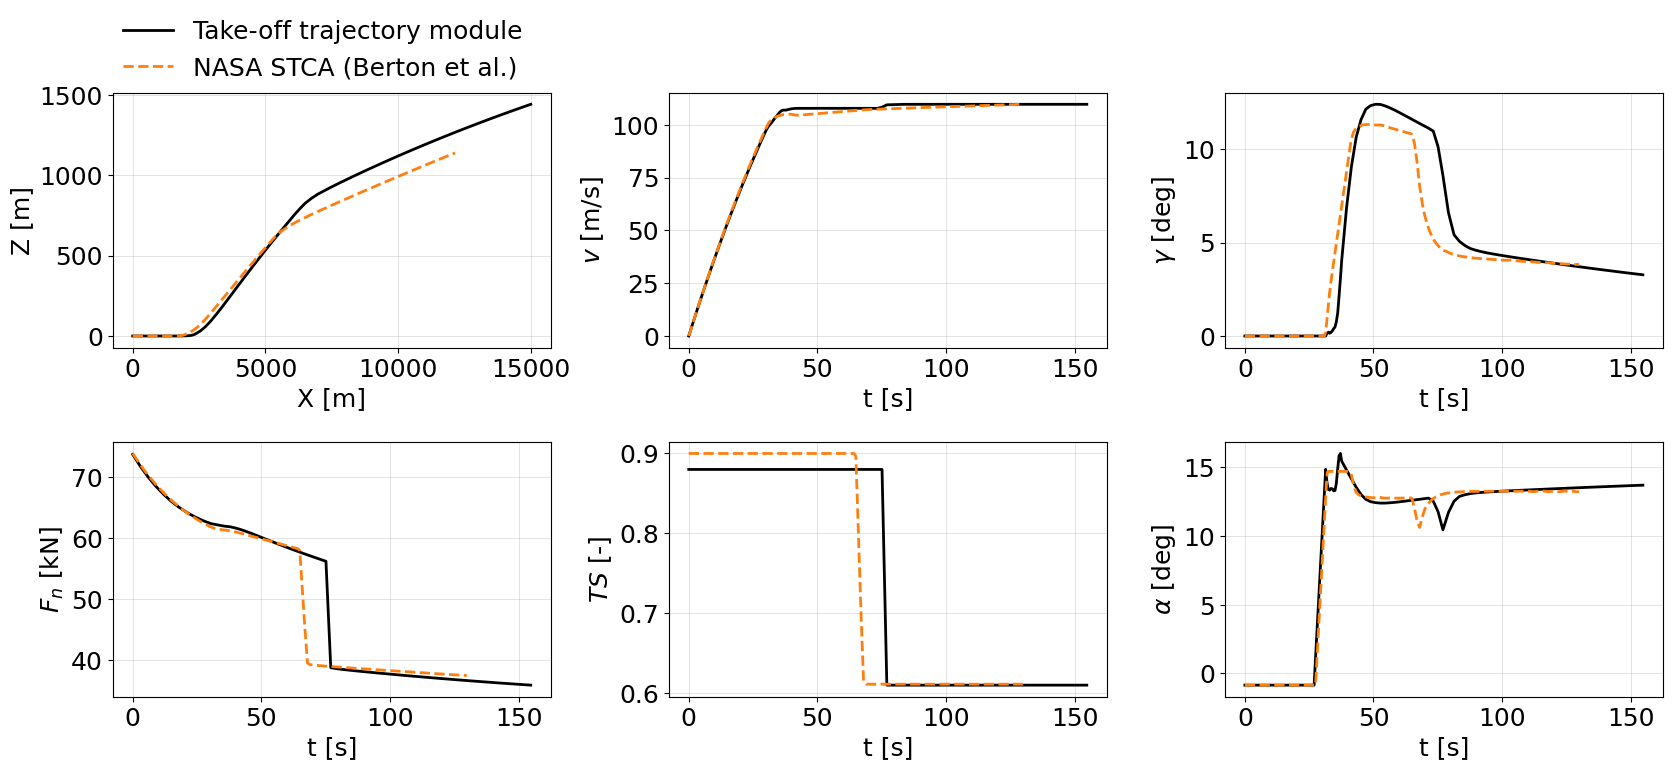

In [24]:
# Compare trajectory with NASA STCA trajectory
py.path.plot(traj_nasa_std)

In [26]:
np.size(py.path.get_val('phases.cutback.interpolated.states:x').flatten())+np.size(py.path.get_val('phases.rotation.interpolated.states:x').flatten())+np.size(py.path.get_val('phases.liftoff.interpolated.states:x').flatten())+np.size(py.path.get_val('phases.vnrs.interpolated.states:x').flatten())
# py.path.get_val('phases.cutback.interpolated.states:x').flatten()

82